In [45]:
import pandas as pd

file_path = 'D:\\Pós DS\\prep\\FULL_DATA_COMENT.csv'

# Ler o arquivo CSV
dfc = pd.read_csv(file_path, delimiter=';', encoding='utf-8-sig')
dfc.head()

,prod-descr,prod-,prod-comentario,prod-aval
0,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Primeiro usei Normalize Extreme (o verdinho) e...,4.2
1,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"Amei, deixou pele oleosa hidratou medida certa...",4.2
2,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Ficou pouco pesado pele.,4.2
3,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Excelente protetor solar. Além proteger bem co...,4.2
4,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"melhor protetor, deixa pele sequinha sensação ...",4.2


In [46]:
dfc['prod-aval'] = dfc['prod-aval'].astype(float)
dfc.dtypes

prod-descr          object
prod-               object
prod-comentario     object
prod-aval          float64
dtype: object

In [47]:
dfc = dfc[dfc['prod-aval'] != 0]

In [48]:
dfc = dfc.sort_values(by='prod-aval', ascending=True).reset_index(drop=True)
dfc.head()

,prod-descr,prod-,prod-comentario,prod-aval
0,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,Esfarela deixa pele oleosa,2.0
1,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"Pior protetor solar usei, extremamente oleoso ...",2.0
2,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"produto descrito pele oleosa, pele aumentou ol...",2.0
3,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,pele extremamente oleosa semana uso fiquei esp...,2.0
4,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,Deixa aspecto oleoso produto esfarela seca.,2.0


In [50]:
vlr_nulos = dfc['prod-comentario'].isnull().sum()
print(vlr_nulos)

10


In [51]:
#excluir comentarios nulos
dfc = dfc.dropna(subset=['prod-comentario']).reset_index(drop=True)

In [52]:
vlr_nulos = dfc['prod-comentario'].isnull().sum()
print(vlr_nulos)

0


In [53]:
import re

#remover caracteres branco 
dfc['prod-comentario'] = dfc['prod-comentario'].str.strip()  

In [54]:
#transformar em minusculas
dfc['prod-comentario'] = dfc['prod-comentario'].str.lower()

In [55]:
import nltk

nltk.download('stopwords')

# Carregando a lista de stopwords em PT-BR
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

def remove_stopwords(comment):
    return ' '.join([word for word in comment.split() if word not in stopwords])

dfc['prod-comentario'] = dfc['prod-comentario'].apply(remove_stopwords)
print(dfc)

                                             prod-descr    prod-  \
0      NIVEA  Nivea Sun Tripla Proteção Controle de ...   NIVEA    
1      NIVEA  Nivea Sun Tripla Proteção Controle de ...   NIVEA    
2      NIVEA  Nivea Sun Tripla Proteção Controle de ...   NIVEA    
3      NIVEA  Nivea Sun Tripla Proteção Controle de ...   NIVEA    
4      NIVEA  Nivea Sun Tripla Proteção Controle de ...   NIVEA    
...                                                 ...      ...   
3415          Hidrasol Protetor Solar Facial FPS 60-50g  Tulípia   
3416   Adcos  Fotoproteção Diária Stick FPS80 Ivory ...   Adcos    
3417               Protetor Solar FPS 70 180g - Ricosol  Ricosol   
3418               Protetor Solar FPS 70 180g - Ricosol  Ricosol   
3419   Adcos  Fotoproteção Diária Stick FPS80 Ivory ...   Adcos    

                                        prod-comentario  prod-aval  
0                            esfarela deixa pele oleosa        2.0  
1     pior protetor solar usei, extremamente 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
dfc = dfc[dfc['prod-comentario'].str.lower() != "comentarios"].reset_index(drop=True)

In [57]:
dfc['prod-comentario'] = dfc['prod-comentario'].str.replace(r'\bpessoa achou útil\b', '', regex=True).str.strip()
dfc['prod-comentario'] = dfc['prod-comentario'].str.replace(r'\bpessoas acharam útil\b', '', regex=True).str.strip()

In [58]:
dfc.head(20)

,prod-descr,prod-,prod-comentario,prod-aval
0,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,esfarela deixa pele oleosa,2.0
1,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"pior protetor solar usei, extremamente oleoso ...",2.0
2,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"produto descrito pele oleosa, pele aumentou ol...",2.0
3,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,pele extremamente oleosa semana uso fiquei esp...,2.0
4,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,deixa aspecto oleoso produto esfarela seca.,2.0
5,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,protetor excelente! protetor físico deixa cara...,2.6
6,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,embalagem horrível! pensei espécie botão solta...,2.6
7,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gostei produto, pois utilizo reaplicar proteto...",2.6
8,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"esperava desse produto , fácil aplicação , pro...",2.6
9,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gente comprem, joguei dinheiro fora. vale pra ...",2.6


In [59]:
dfc = dfc[dfc['prod-comentario'].str.strip() != ""].reset_index(drop=True)

In [60]:
len(dfc)

3418

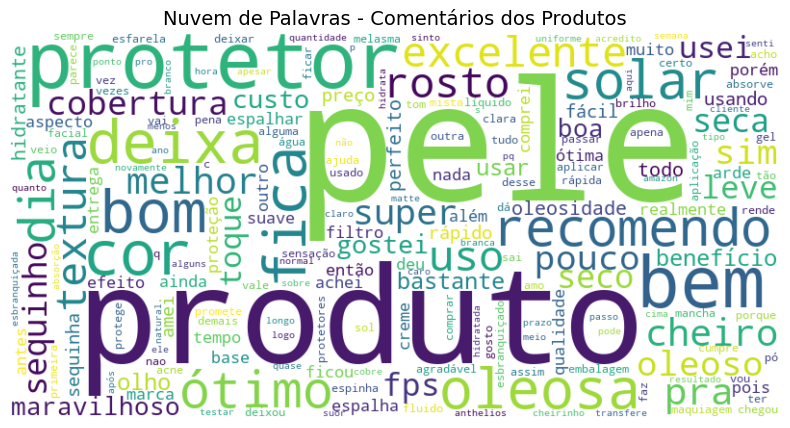

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_comments = ' '.join(dfc['prod-comentario'])

#gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Comentários dos Produtos', fontsize=14)
plt.show()

In [65]:
from transformers import pipeline

sentimento = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

dfc['analise_sentimento'] = dfc['prod-comentario'].apply(lambda x: sentimento(x[:512])[0])
dfc['sentimento'] = dfc['analise_sentimento'].apply(lambda x: x['label'])
dfc['acuracidade'] = dfc['analise_sentimento'].apply(lambda x: x['score'])

dfc.head(20)

,prod-descr,prod-,prod-comentario,prod-aval,analise_sentimento,sentimento,acuracidade
0,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,esfarela deixa pele oleosa,2.0,"{'label': '1 star', 'score': 0.5528872609138489}",1 star,0.552887
1,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"pior protetor solar usei, extremamente oleoso ...",2.0,"{'label': '1 star', 'score': 0.45172104239463806}",1 star,0.451721
2,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"produto descrito pele oleosa, pele aumentou ol...",2.0,"{'label': '2 stars', 'score': 0.36785387992858...",2 stars,0.367854
3,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,pele extremamente oleosa semana uso fiquei esp...,2.0,"{'label': '5 stars', 'score': 0.6552525758743286}",5 stars,0.655253
4,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,deixa aspecto oleoso produto esfarela seca.,2.0,"{'label': '1 star', 'score': 0.5114826560020447}",1 star,0.511483
5,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,protetor excelente! protetor físico deixa cara...,2.6,"{'label': '1 star', 'score': 0.7018008232116699}",1 star,0.701801
6,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,embalagem horrível! pensei espécie botão solta...,2.6,"{'label': '1 star', 'score': 0.8969385623931885}",1 star,0.896939
7,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gostei produto, pois utilizo reaplicar proteto...",2.6,"{'label': '5 stars', 'score': 0.3806370794773102}",5 stars,0.380637
8,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"esperava desse produto , fácil aplicação , pro...",2.6,"{'label': '2 stars', 'score': 0.43092378973960...",2 stars,0.430924
9,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gente comprem, joguei dinheiro fora. vale pra ...",2.6,"{'label': '1 star', 'score': 0.8765573501586914}",1 star,0.876557


In [67]:
def atualizar_sentimento(label):
    if label in ["1 star", "2 stars"]:
        return "negativo"
    elif label == "3 stars":
        return "neutro"
    elif label in ["4 stars", "5 stars"]:
        return "positivo"
    return label  

dfc['sentimento'] = dfc['sentimento'].apply(atualizar_sentimento)
dfc.head(20)

,prod-descr,prod-,prod-comentario,prod-aval,analise_sentimento,sentimento,acuracidade
0,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,esfarela deixa pele oleosa,2.0,"{'label': '1 star', 'score': 0.5528872609138489}",negativo,0.552887
1,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"pior protetor solar usei, extremamente oleoso ...",2.0,"{'label': '1 star', 'score': 0.45172104239463806}",negativo,0.451721
2,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,"produto descrito pele oleosa, pele aumentou ol...",2.0,"{'label': '2 stars', 'score': 0.36785387992858...",negativo,0.367854
3,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,pele extremamente oleosa semana uso fiquei esp...,2.0,"{'label': '5 stars', 'score': 0.6552525758743286}",positivo,0.655253
4,NIVEA Nivea Sun Tripla Proteção Controle de ...,NIVEA,deixa aspecto oleoso produto esfarela seca.,2.0,"{'label': '1 star', 'score': 0.5114826560020447}",negativo,0.511483
5,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,protetor excelente! protetor físico deixa cara...,2.6,"{'label': '1 star', 'score': 0.7018008232116699}",negativo,0.701801
6,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,embalagem horrível! pensei espécie botão solta...,2.6,"{'label': '1 star', 'score': 0.8969385623931885}",negativo,0.896939
7,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gostei produto, pois utilizo reaplicar proteto...",2.6,"{'label': '5 stars', 'score': 0.3806370794773102}",positivo,0.380637
8,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"esperava desse produto , fácil aplicação , pro...",2.6,"{'label': '2 stars', 'score': 0.43092378973960...",negativo,0.430924
9,ISDIN UV Brush Mineral FPS50 - Protetor Sola...,ISDIN,"gente comprem, joguei dinheiro fora. vale pra ...",2.6,"{'label': '1 star', 'score': 0.8765573501586914}",negativo,0.876557


In [69]:
acima_07 = len(dfc[dfc['acuracidade'] > 0.5])
abaixo_07 = len(dfc[dfc['acuracidade'] <= 0.5])

print("Linhas com acuracidade acima de 0.5:", acima_07)
print("Linhas com acuracidade abaixo ou igual a 0.5:", abaixo_07)

Linhas com acuracidade acima de 0.5: 1608
Linhas com acuracidade abaixo ou igual a 0.5: 1810


In [70]:
dfc.to_csv(r'D:\\Pós DS\\prep\\ANALISE_data_comentarios.csv', index=False, sep=';', encoding='utf-8-sig')

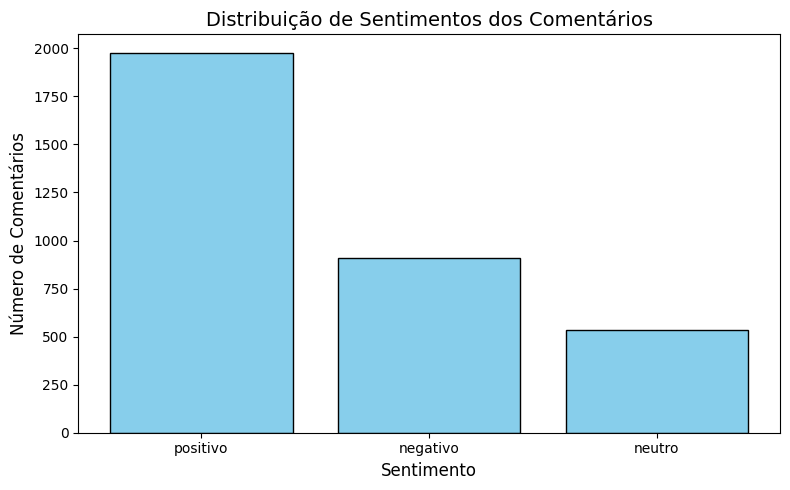

In [71]:
import matplotlib.pyplot as plt

sentimento_counts = dfc['sentimento'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentimento_counts.index, sentimento_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição de Sentimentos dos Comentários', fontsize=14)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Número de Comentários', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

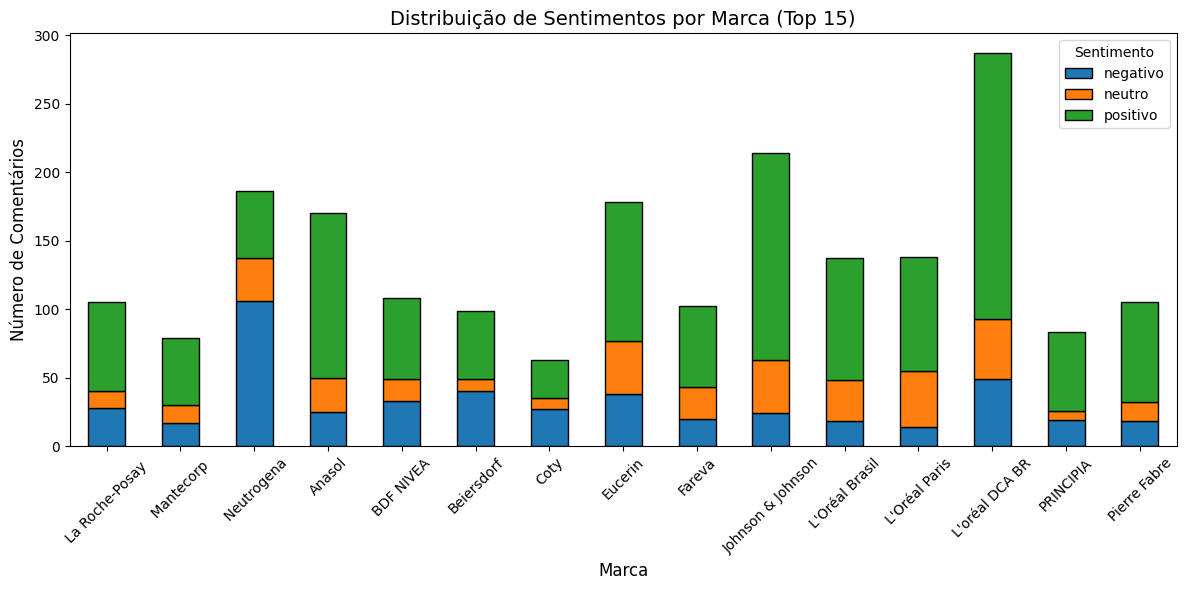

In [75]:
top_marcas = dfc['prod-'].value_counts().head(15).index

df_top_marcas = dfc[dfc['prod-'].isin(top_marcas)]
marca_sentimento_counts_top = df_top_marcas.groupby(['prod-', 'sentimento']).size().unstack(fill_value=0)
marca_sentimento_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')

plt.title('Distribuição de Sentimentos por Marca (Top 15)', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Número de Comentários', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentimento')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

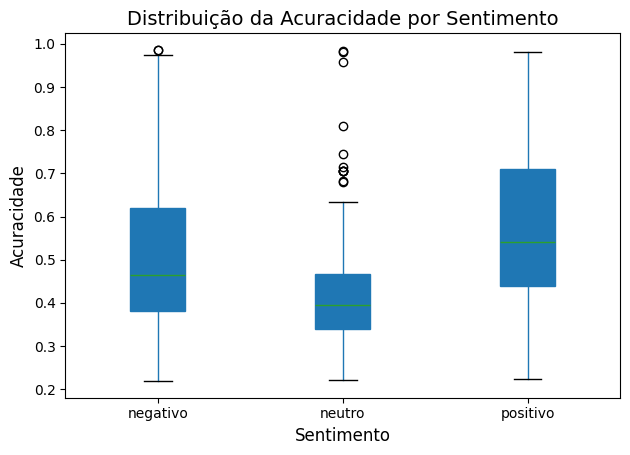

In [76]:
plt.figure(figsize=(10, 6))
dfc.boxplot(column='acuracidade', by='sentimento', grid=False, patch_artist=True)

plt.title('Distribuição da Acuracidade por Sentimento', fontsize=14)
plt.suptitle('')  
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Acuracidade', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
dfc.describe()

,prod-aval,acuracidade
count,3418.000000,3418.000000
mean,4.604125,0.533220
std,0.316640,0.175827
min,2.000000,0.219028
25%,4.600000,0.398596
50%,4.700000,0.488973
75%,4.800000,0.656080
max,5.000000,0.985972


In [80]:
df_aval_neg = dfc[(dfc['prod-aval'] < 3) & (dfc['sentimento'] == 'positivo') & (dfc['acuracidade'] > 0.7)]
print(len(df_aval_neg))
df_aval_neg.head(20)

1


,prod-descr,prod-,prod-comentario,prod-aval,analise_sentimento,sentimento,acuracidade
10,La Roche-Posay Anthelios UVMune400 Airlicium...,La Roche-Posay,filtro solar maravilhoso. pele oleosa único dá...,2.7,"{'label': '5 stars', 'score': 0.8678992986679077}",positivo,0.867899


In [81]:
df_aval_pos = dfc[(dfc['prod-aval'] > 4) & (dfc['sentimento'] == 'negativo') & (dfc['acuracidade'] > 0.7)]
print(len(df_aval_pos))

143


,prod-descr,prod-,prod-comentario,prod-aval,analise_sentimento,sentimento,acuracidade
252,Vichy V Capital Soileil Hydra-Matte FPS50 2....,Vichy,cheiro desse protetor incrível! super sequinho...,4.2,"{'label': '1 star', 'score': 0.7514257431030273}",negativo,0.751426
262,Melora Heliocare Max Defense Gel Creme Color...,Melora,"havia experimentado amostra produto, sendo tom...",4.2,"{'label': '1 star', 'score': 0.7566271424293518}",negativo,0.756627
276,Ekilibre Amazônia FPUVA 28 FPS 30 - Protetor...,Ekilibre Amazônia,"produto chegou 3 dias, produto ótimo , equipe ...",4.2,"{'label': '1 star', 'score': 0.7775517702102661}",negativo,0.777552
277,ISDIN Foto Ultra Active Unify FPS 99 - Prote...,ISDIN,"comprei produto esposo, melasma. tentado tudo,...",4.2,"{'label': '1 star', 'score': 0.7944221496582031}",negativo,0.794422
289,Bioderma Photoderm Nude Touch FPS 50+ 1.0 - ...,Bioderma,péssimo! protetor caro usei vida pior! parece ...,4.3,"{'label': '1 star', 'score': 0.9651466608047485}",negativo,0.965147
300,Darrow Actine FPS60 - Protetor Solar com Cor...,Darrow,"cheiro horrível gostei, textura pele fica meio...",4.3,"{'label': '1 star', 'score': 0.7166354656219482}",negativo,0.716635
318,Protetor Solar Facial Bioderma Photoderm Cover...,Bioderma,0 maria i. produto pele oleosa produto realça ...,4.4,"{'label': '1 star', 'score': 0.8689864873886108}",negativo,0.868986
410,Bioderma Photoderm Nude Touch FPS 50+ 2.0 - ...,Bioderma,péssimo! protetor caro usei vida pior! parece ...,4.4,"{'label': '1 star', 'score': 0.9651466608047485}",negativo,0.965147
416,La Roche-Posay Anthelios Airlicium FPS80 Cor...,La Roche-Posay,sabe cola branca escolar? textura bem parecida...,4.4,"{'label': '1 star', 'score': 0.7511264681816101}",negativo,0.751126
420,Bioderma Photoderm Nude Touch FPS 50+ 2.0 - ...,Bioderma,"compraria novamente! gostei, demora secar, sec...",4.4,"{'label': '1 star', 'score': 0.9507438540458679}",negativo,0.950744


In [82]:
df_aval_pos.head(40)

,prod-descr,prod-,prod-comentario,prod-aval,analise_sentimento,sentimento,acuracidade
252,Vichy V Capital Soileil Hydra-Matte FPS50 2....,Vichy,cheiro desse protetor incrível! super sequinho...,4.2,"{'label': '1 star', 'score': 0.7514257431030273}",negativo,0.751426
262,Melora Heliocare Max Defense Gel Creme Color...,Melora,"havia experimentado amostra produto, sendo tom...",4.2,"{'label': '1 star', 'score': 0.7566271424293518}",negativo,0.756627
276,Ekilibre Amazônia FPUVA 28 FPS 30 - Protetor...,Ekilibre Amazônia,"produto chegou 3 dias, produto ótimo , equipe ...",4.2,"{'label': '1 star', 'score': 0.7775517702102661}",negativo,0.777552
277,ISDIN Foto Ultra Active Unify FPS 99 - Prote...,ISDIN,"comprei produto esposo, melasma. tentado tudo,...",4.2,"{'label': '1 star', 'score': 0.7944221496582031}",negativo,0.794422
289,Bioderma Photoderm Nude Touch FPS 50+ 1.0 - ...,Bioderma,péssimo! protetor caro usei vida pior! parece ...,4.3,"{'label': '1 star', 'score': 0.9651466608047485}",negativo,0.965147
300,Darrow Actine FPS60 - Protetor Solar com Cor...,Darrow,"cheiro horrível gostei, textura pele fica meio...",4.3,"{'label': '1 star', 'score': 0.7166354656219482}",negativo,0.716635
318,Protetor Solar Facial Bioderma Photoderm Cover...,Bioderma,0 maria i. produto pele oleosa produto realça ...,4.4,"{'label': '1 star', 'score': 0.8689864873886108}",negativo,0.868986
410,Bioderma Photoderm Nude Touch FPS 50+ 2.0 - ...,Bioderma,péssimo! protetor caro usei vida pior! parece ...,4.4,"{'label': '1 star', 'score': 0.9651466608047485}",negativo,0.965147
416,La Roche-Posay Anthelios Airlicium FPS80 Cor...,La Roche-Posay,sabe cola branca escolar? textura bem parecida...,4.4,"{'label': '1 star', 'score': 0.7511264681816101}",negativo,0.751126
420,Bioderma Photoderm Nude Touch FPS 50+ 2.0 - ...,Bioderma,"compraria novamente! gostei, demora secar, sec...",4.4,"{'label': '1 star', 'score': 0.9507438540458679}",negativo,0.950744


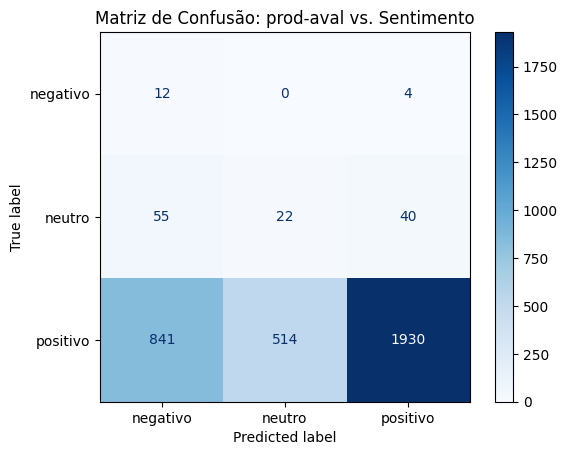

In [84]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def categorize_prod_aval(value):
    if value < 3:
        return "negativo"
    elif 3 <= value < 4:
        return "neutro"
    else:
        return "positivo"

dfc['categoria_aval'] = dfc['prod-aval'].apply(categorize_prod_aval)
conf_matrix = confusion_matrix(dfc['categoria_aval'], dfc['sentimento'], labels=["negativo", "neutro", "positivo"])

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negativo", "neutro", "positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: prod-aval vs. Sentimento')
plt.show()

In [86]:
#acuracia geral
total_predicao_ok = 12 + 22 + 1930  #valores da diagonal principal
total_pred = 12 + 0 + 4 + 55 + 22 + 40 + 841 + 514 + 1930  #valores da matriz

acuracia = (total_predicao_ok / total_pred) * 100  
print(f'Acuracidade Geral do Modelo: {acuracia}%')

Acuracidade Geral do Modelo: 57.460503218256285%
